In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [37]:
df = pd.read_csv(r'C:\Users\salman\OneDrive\Desktop\SEM 6\ML\datasets\transform\diabetes.csv')

In [38]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               778 non-null    int64  
 1   Glucose                   778 non-null    int64  
 2   BloodPressure             778 non-null    int64  
 3   SkinThickness             778 non-null    int64  
 4   Insulin                   778 non-null    int64  
 5   BMI                       778 non-null    float64
 6   DiabetesPedigreeFunction  778 non-null    float64
 7   Age                       778 non-null    int64  
 8   Outcome                   778 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.8 KB


Information about dataset attributes -

Pregnancies: To express the Number of pregnancies

Glucose: To express the Glucose level in blood

BloodPressure: To express the Blood pressure measurement

SkinThickness: To express the thickness of the skin

Insulin: To express the Insulin level in blood

BMI: To express the Body mass index

DiabetesPedigreeFunction: To express the Diabetes percentage

Age: To express the age

Outcome: To express the final result 1 is Yes and 0 is No

In [40]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000
mean,3.821337,121.199229,68.975578,20.763496,80.388175,32.185476,0.471861,33.347044,0.349614
std,3.360794,31.990831,19.471675,16.329714,115.113501,8.215687,0.330180,11.789024,0.477155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.325000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.250000,0.374500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.775000,0.626750,41.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [41]:
df.rename({'Outcome':'target'},inplace=True,axis='columns')

In [42]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


C:\Users\salman\AppData\Local\Temp\ipykernel_6960\111277950.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


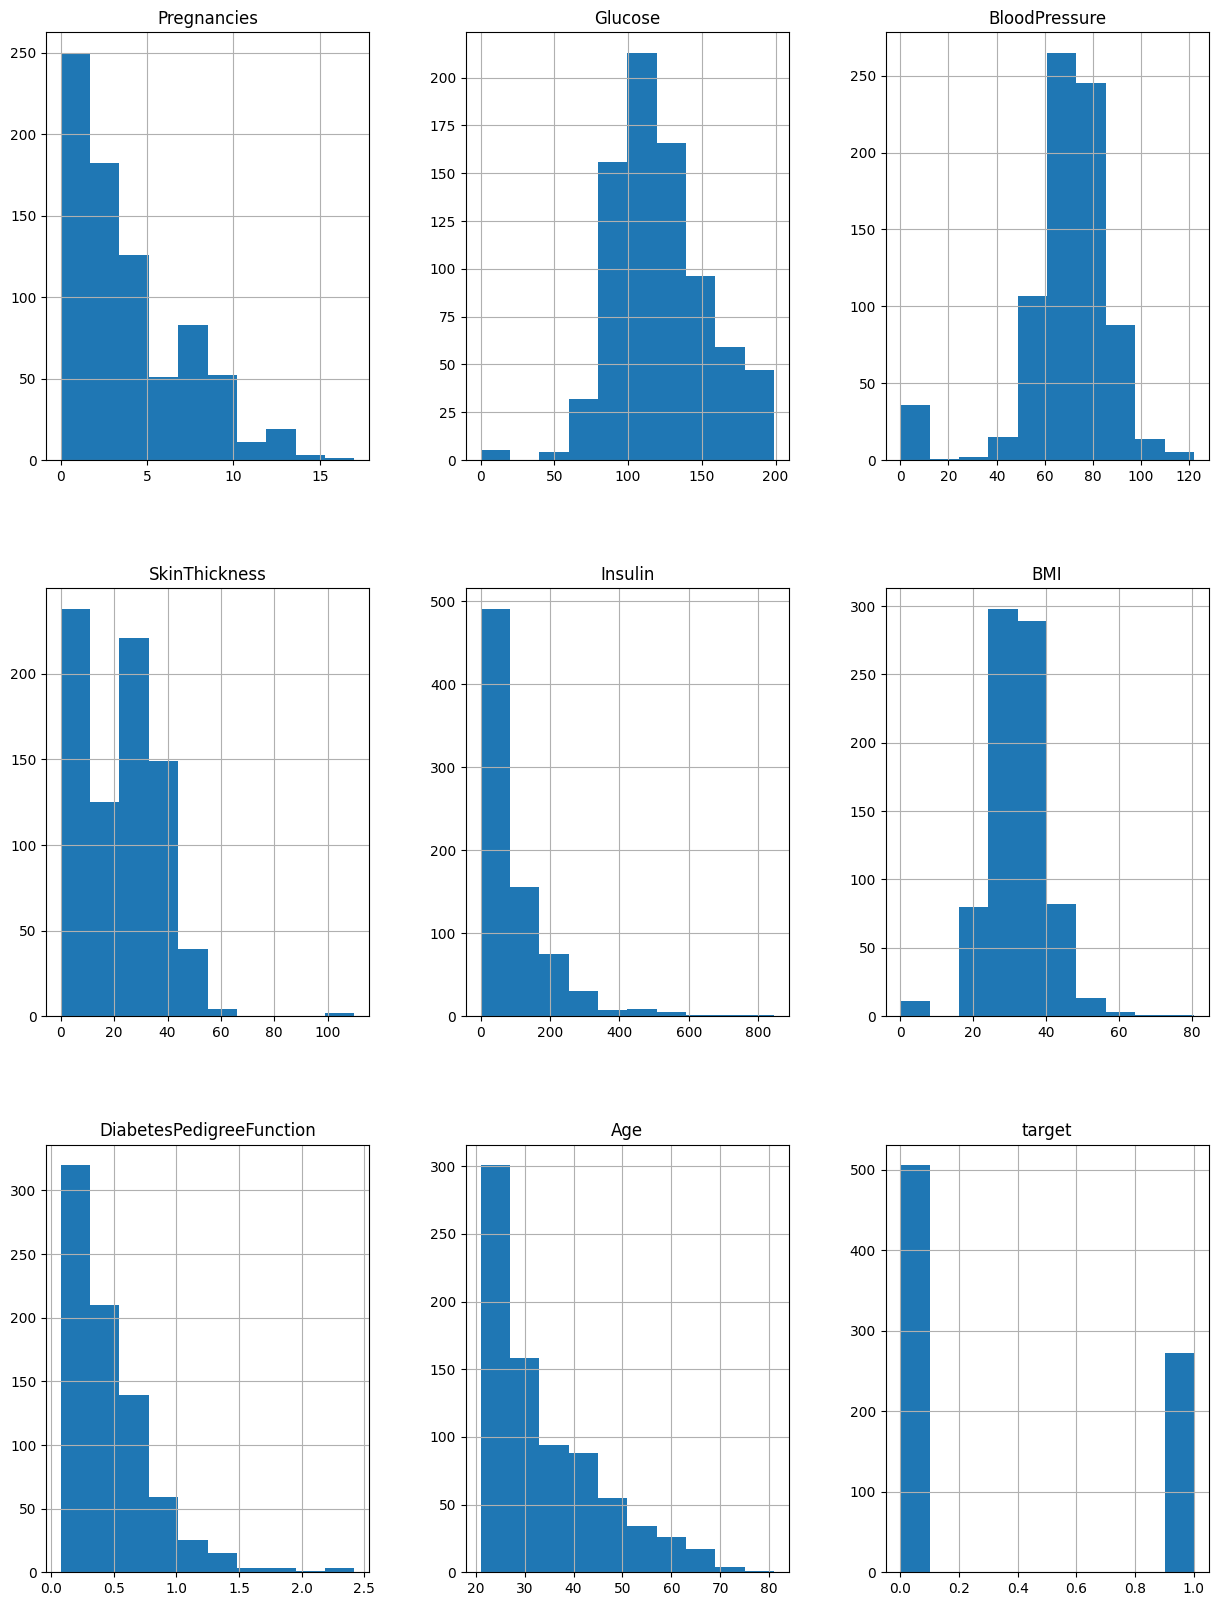

In [43]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

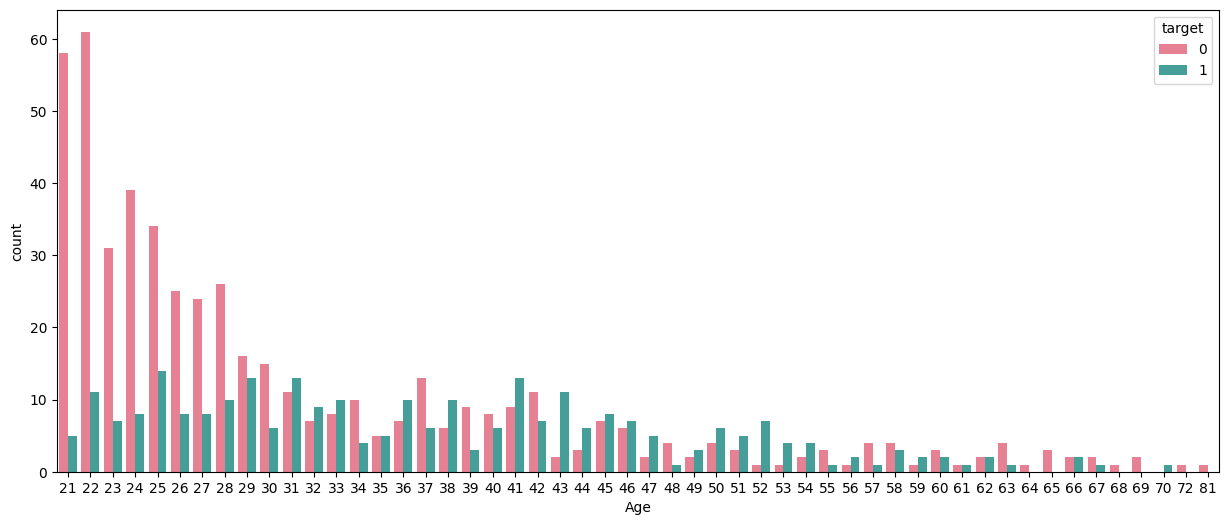

In [44]:
plt.figure(figsize=(15,6))
sns.countplot(x='Age',data = df, hue = 'target',palette='husl')
plt.show()

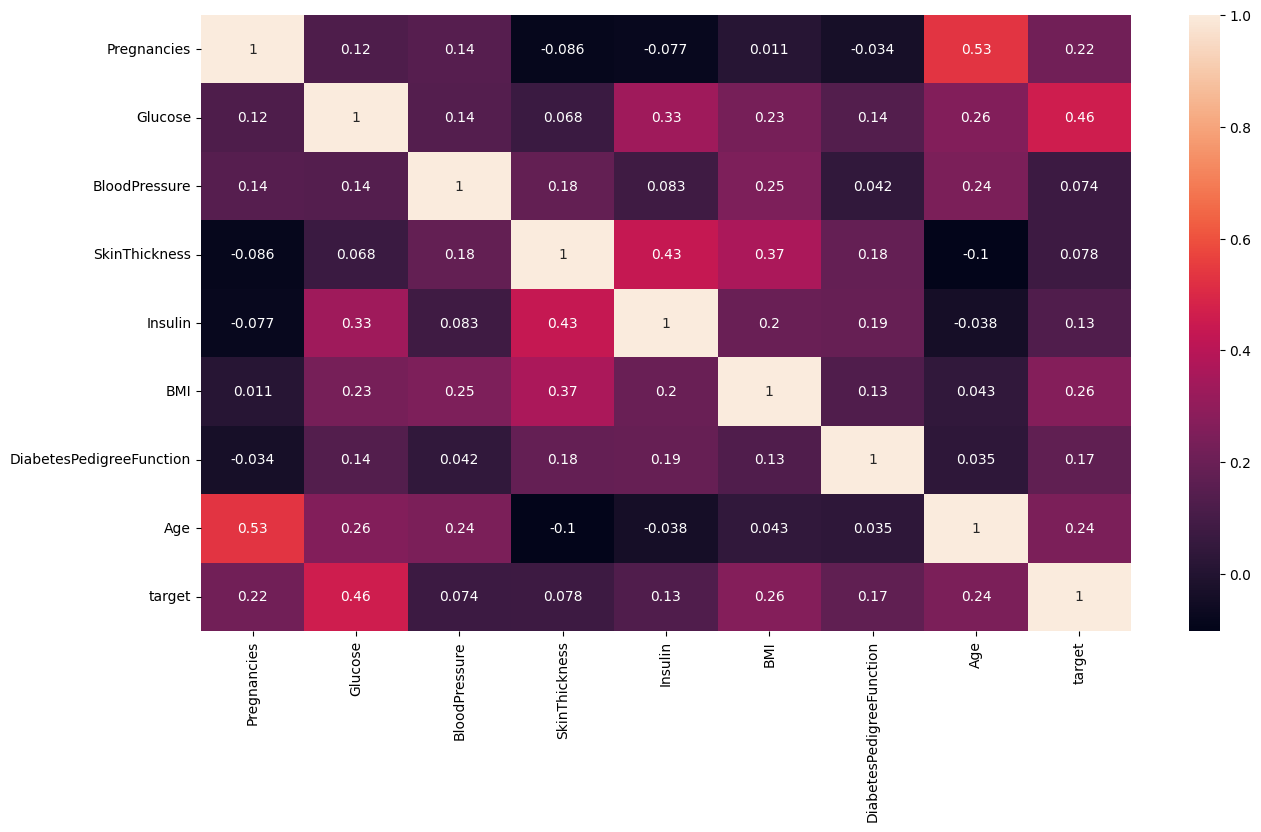

In [45]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [46]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((622, 8), (156, 8), (622,), (156,))

In [48]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

c:\Users\salman\OneDrive\Desktop\SEM 6\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
eval_model = dict()

In [50]:
eval_model['LogisticRegression'] = {
    'accuracy':log_reg.score(X_test, y_test),
    'model':log_reg
    }

In [51]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = log_reg.predict(X_test)

confusion_matrix(y_test, y_pred)



array([[85, 25],
       [16, 30]], dtype=int64)

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.81       110
           1       0.55      0.65      0.59        46

    accuracy                           0.74       156
   macro avg       0.69      0.71      0.70       156
weighted avg       0.75      0.74      0.74       156



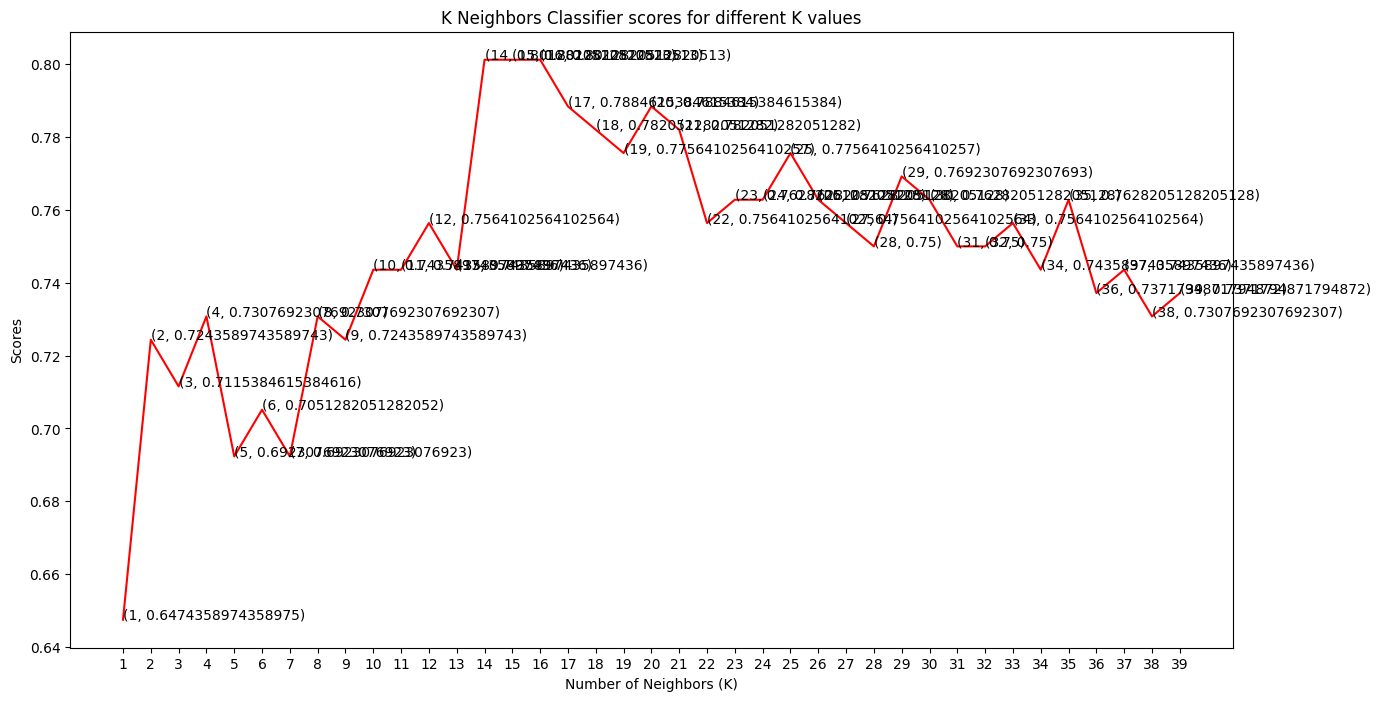

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn_scores = []
for k in range(1,40):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

plt.figure(figsize=(15,8))
plt.plot([k for k in range(1,40)], knn_scores, color = 'red')
for i in range(1,40):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1,40)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.show()

In [54]:
np.argmax(knn_scores)

13

In [55]:
k = np.argmax(knn_scores) + 1
knn_classifier = KNeighborsClassifier(n_neighbors = k)
knn_classifier.fit(X_train, y_train)
knn_classifier.score(X_test, y_test)

0.8012820512820513

In [56]:
eval_model['Knn'] = {
    'accuracy':knn_classifier.score(X_test, y_test),
    'model':knn_classifier
    }

In [57]:
# save the model to disk

import pickle

filename = '../../model/heart_disease.pkl'

pickle.dump(knn_classifier, open(filename, 'wb'))


In [58]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [59]:
gnb.score(X_test, y_test)
eval_model['Gaussing'] = {
    'accuracy':gnb.score(X_test, y_test),
    'model':gnb
    }

In [60]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [61]:
dt.score(X_test,y_test)
eval_model['DicisionTree'] = {
    'accuracy':dt.score(X_test,y_test),
    'model':dt
    }

In [62]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [63]:
rf.score(X_test,y_test)
eval_model['RandomForest'] = {
    'accuracy':rf.score(X_test,y_test),
    'model':rf
    }

In [64]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [65]:
svm.score(X_test,y_test)
eval_model['SupportVectorMachine'] = {
    'accuracy':svm.score(X_test,y_test),
    'model':svm
    }

In [66]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier()
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)

In [67]:
nn.score(X_test,y_test)
eval_model['NeuralNetwork'] = {
    'accuracy':nn.score(X_test,y_test),
    'model':nn
    }

In [68]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

In [69]:
ada.score(X_test,y_test)
eval_model['AdaBoost'] = {
    'accuracy':ada.score(X_test,y_test),
    'model':ada
    }

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [71]:
gb.score(X_test,y_test)
eval_model['GradientBoosting'] = {
    'accuracy':gb.score(X_test,y_test),
    'model':gb
    }

In [72]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier()
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)

In [73]:
bag.score(X_test,y_test)
eval_model['Bagging'] = {
    'accuracy':bag.score(X_test,y_test),
    'model':bag
    }

In [74]:
eval_model

{'LogisticRegression': {'accuracy': 0.7371794871794872,
  'model': LogisticRegression()},
 'Knn': {'accuracy': 0.8012820512820513,
  'model': KNeighborsClassifier(n_neighbors=14)},
 'Gaussing': {'accuracy': 0.7371794871794872, 'model': GaussianNB()},
 'DicisionTree': {'accuracy': 0.6730769230769231,
  'model': DecisionTreeClassifier()},
 'RandomForest': {'accuracy': 0.75, 'model': RandomForestClassifier()},
 'SupportVectorMachine': {'accuracy': 0.7628205128205128, 'model': SVC()},
 'NeuralNetwork': {'accuracy': 0.75, 'model': MLPClassifier()},
 'AdaBoost': {'accuracy': 0.7115384615384616, 'model': AdaBoostClassifier()},
 'GradientBoosting': {'accuracy': 0.7307692307692307,
  'model': GradientBoostingClassifier()},
 'Bagging': {'accuracy': 0.7051282051282052, 'model': BaggingClassifier()}}

In [75]:
evaldf = pd.DataFrame(eval_model)
evaldf

,LogisticRegression,Knn,Gaussing,DicisionTree,RandomForest,SupportVectorMachine,NeuralNetwork,AdaBoost,GradientBoosting,Bagging
accuracy,0.737179,0.801282,0.737179,0.673077,0.75,0.762821,0.75,0.711538,0.730769,0.705128
model,LogisticRegression(),KNeighborsClassifier(n_neighbors=14),GaussianNB(),DecisionTreeClassifier(),"(DecisionTreeClassifier(max_features='sqrt', r...",SVC(),MLPClassifier(),"(DecisionTreeClassifier(max_depth=1, random_st...",([DecisionTreeRegressor(criterion='friedman_ms...,(DecisionTreeClassifier(random_state=175552385...


In [76]:
df = evaldf.T.reset_index(level=0)

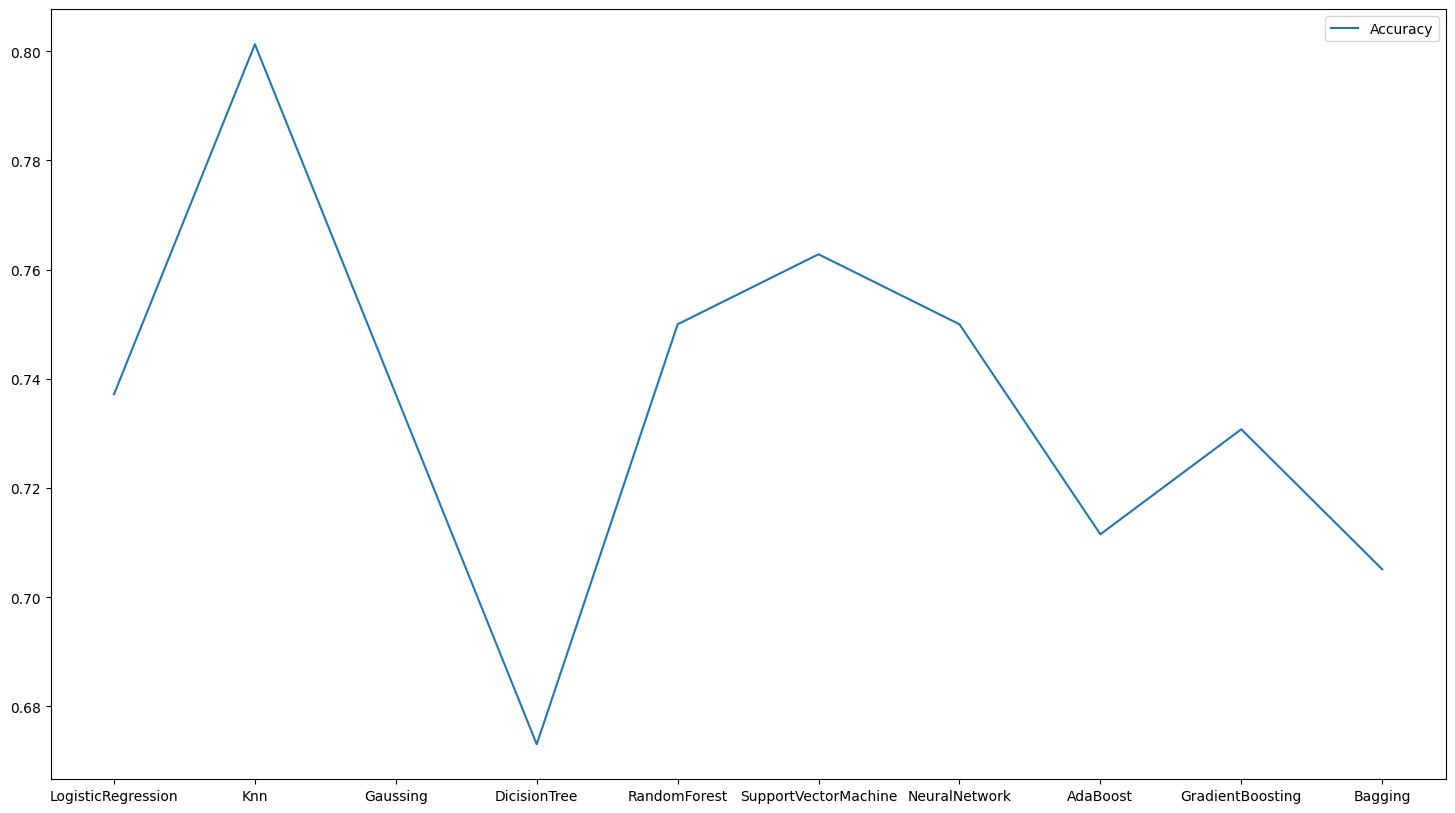

In [77]:
plt.figure(figsize=(18,10))
plt.plot(df['index'],df['accuracy'],label='Accuracy')
plt.legend()
plt.show()

In [78]:
df.head()

,index,accuracy,model
0,LogisticRegression,0.737179,LogisticRegression()
1,Knn,0.801282,KNeighborsClassifier(n_neighbors=14)
2,Gaussing,0.737179,GaussianNB()
3,DicisionTree,0.673077,DecisionTreeClassifier()
4,RandomForest,0.75,"(DecisionTreeClassifier(max_features='sqrt', r..."


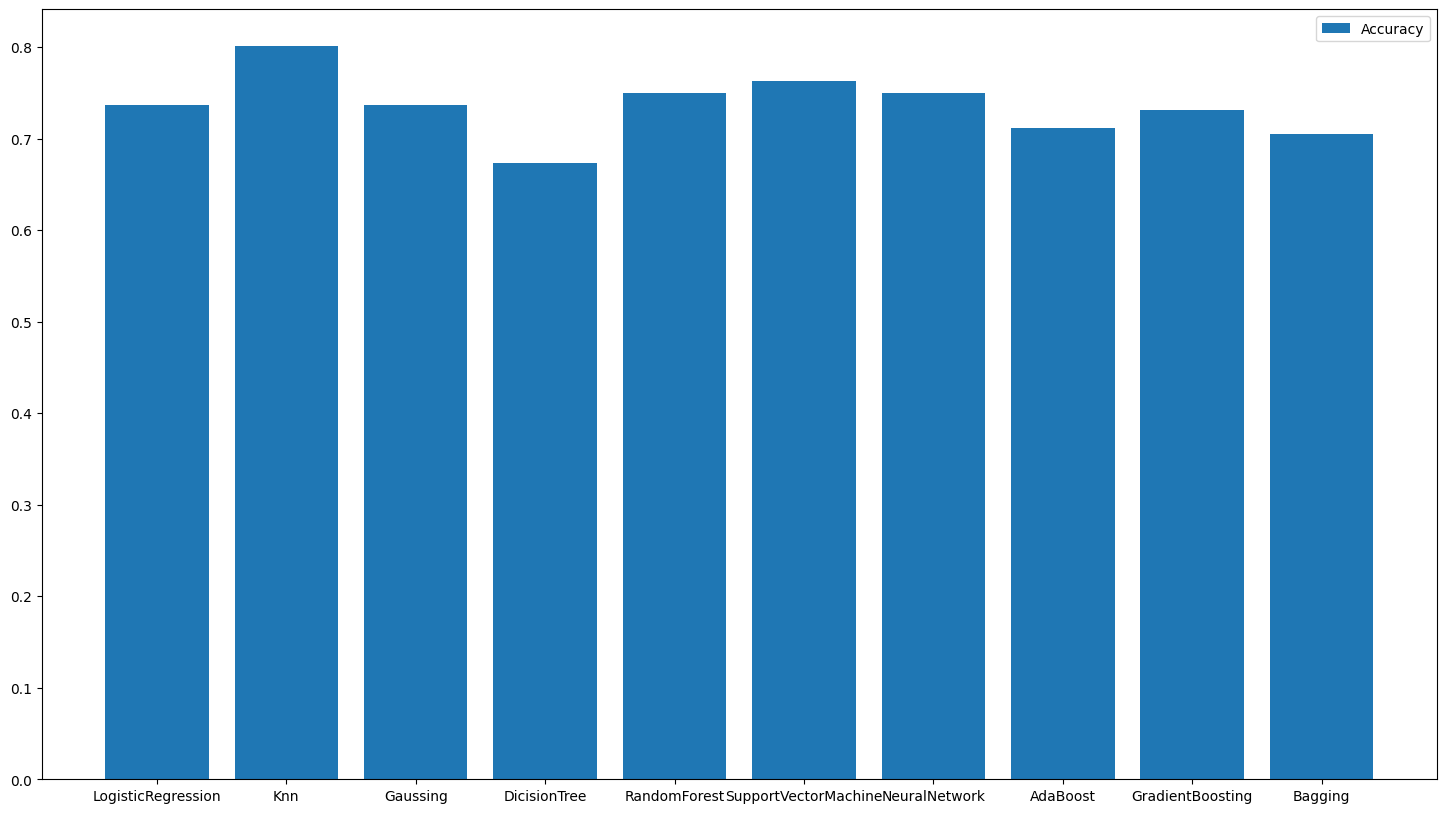

In [79]:
plt.figure(figsize=(18,10))
plt.bar(df['index'],df['accuracy'],label='Accuracy')
plt.legend()
plt.show()

In [80]:
max(df['accuracy'])

0.8012820512820513

In [81]:
df[df['accuracy'] == max(df['accuracy'])]

,index,accuracy,model
1,Knn,0.801282,KNeighborsClassifier(n_neighbors=14)


In [82]:
df

,index,accuracy,model
0,LogisticRegression,0.737179,LogisticRegression()
1,Knn,0.801282,KNeighborsClassifier(n_neighbors=14)
2,Gaussing,0.737179,GaussianNB()
3,DicisionTree,0.673077,DecisionTreeClassifier()
4,RandomForest,0.75,"(DecisionTreeClassifier(max_features='sqrt', r..."
5,SupportVectorMachine,0.762821,SVC()
6,NeuralNetwork,0.75,MLPClassifier()
7,AdaBoost,0.711538,"(DecisionTreeClassifier(max_depth=1, random_st..."
8,GradientBoosting,0.730769,([DecisionTreeRegressor(criterion='friedman_ms...
9,Bagging,0.705128,(DecisionTreeClassifier(random_state=175552385...
